<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/Pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importação das Bibliotecas

O ponto de partida de qualquer análise em Python é a importação das bibliotecas. O código carrega o "canivete suíço" da ciência de dados: pandas para a manipulação de tabelas (DataFrames) , numpy para operações numéricas eficientes , matplotlib e seaborn para a visualização gráfica, e sklearn para ferramentas de aprendizado de máquina.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

## 2. Leitura do Arquivo CSV

Imediatamente após a importação das bibliotecas, ocorre a leitura do arquivo CSV. O comando pd.read_csv  carrega os dados brutos para a memória, armazenando-os na variável df. A contagem de linhas (len(df)) revela a escala do problema: um conjunto de 17.378 estrelas, informação crucial para o planejamento computacional.



In [2]:
# Carregamos o arquivo CSV em um DataFrame do Pandas.

df = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas = len(df)
print(f"O número total de estrelas é: {numero_estrelas}")

O número total de estrelas é: 17378


In [3]:
# Carregamos o arquivo CSV do erro em um DataFrame do Pandas separadamente.


df_err = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/MAG_ERR_APER_COR_3_0.csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas_err = len(df)
print(f"O número total de estrelas é: {numero_estrelas_err}")

O número total de estrelas é: 17378


## 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos. Já o dataframe que possui `TILE_ID`, `NUMBER`, `MAG_ERR_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe` é relacionado ao Vetor de erro para magnitude.

In [4]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


Antes de modificar qualquer dado, é vital inspecioná-lo. Inicialmente realiza-se a visualização das primeiras linhas com df.head(). Esta é uma etapa diagnóstica essencial. A saída revela imediatamente o primeiro desafio de pré-processamento: as colunas MAG_APER_COR_3_0 e MAG_ERR_APER_COR_3_0 não são um valor único, mas sim uma string de texto contendo dezenas de valores de magnitude separados por espaços, o primeirosão os valores propriamente dito das agnitudes e o segundo é o erro por cada uma delas.

In [5]:
#Exibimos as primeiras linhas do DataFrame dos erros para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_err.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...


## 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [6]:
# 1. PROCESSAMENTO SEPARADO PARA CADA DATAFRAME

# Para df (magnitudes)
colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Para df_err (erros)
colunas_err_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [7]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [8]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df_err.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_ERR_APER_COR_3_0'], dtype='object')


In [9]:
# Dividimos as colunas `MAG_APER_COR_3_0` e 'MAG_ERR_APER_COR_3_0' em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)
df_err[colunas_err_fotometria] = df_err['MAG_ERR_APER_COR_3_0'].str.split(expand=True)


In [10]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)
df_err[colunas_err_fotometria] = df_err[colunas_err_fotometria].apply(pd.to_numeric)

In [11]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [12]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df_err.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,Fotometria_5,Fotometria_6,Fotometria_7,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,0.0497,0.0475,0.0273,0.0151,0.0151,0.0116,0.0124,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0059,0.0032,0.0033,0.0018,0.0047,0.0028,0.0037,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,0.0065,0.0049,0.0054,0.0025,0.0058,0.0035,0.0044,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.0076,0.0051,0.0090,0.0028,0.0066,0.0052,0.0056,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.0053,0.0045,0.0051,0.0026,0.0061,0.0037,0.0047,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


In [13]:
# 2. RENOMEÇÃO PARA AMBOS OS DATAFRAMES (Renomear as bandas fotométricas)

# Carregar o arquivo CSV com os nomes das bandas
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Verificar se temos 57 nomes de banda (para corresponder às 57 colunas de fotometria)
if len(filter_names) == 57:
    # Criar um dicionário para mapear os nomes antigos para os novos
    rename_dict = {f'Fotometria_{i+1}': filter_names[i] for i in range(57)}

    # Renomear as colunas no DataFrame principal
    df = df.rename(columns=rename_dict)
    df_err = df_err.rename(columns=rename_dict)

    print("Bandas fotométricas renomeadas com sucesso!")
else:
    print(f"Atenção: Número de bandas ({len(filter_names)}) não corresponde ao número de colunas de fotometria (57)")

Bandas fotométricas renomeadas com sucesso!


In [14]:
# 3. REMOVER COLUNAS ORIGINAIS
#df = df.drop(['MAG_APER_COR_3_0'], axis=1)
#df_err = df_err.drop(['MAG_ERR_APER_COR_3_0'], axis=1)

#print("Colunas originais removidas com sucesso!")

In [15]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [16]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_err.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,uJAVA,J0378,J0390,J0400,J0410,J0420,J0430,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,0.0497,0.0475,0.0273,0.0151,0.0151,0.0116,0.0124,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0059,0.0032,0.0033,0.0018,0.0047,0.0028,0.0037,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,0.0065,0.0049,0.0054,0.0025,0.0058,0.0035,0.0044,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.0076,0.0051,0.0090,0.0028,0.0066,0.0052,0.0056,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.0053,0.0045,0.0051,0.0026,0.0061,0.0037,0.0047,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


Esses blocos executam o "coração" do pré-processamento. O objetivo é "desmembrar" aquela string problemática em colunas numéricas individuais.

Primeiro, uma lista de 57 nomes de colunas genéricos (ex: Fotometria_1, Fotometria_2...) é criada.

Em seguida, o método str.split(expand=True) é aplicado à coluna MAG_APER_COR_3_0. Esta função "fatia" a string em cada espaço, e o expand=True garante que cada valor fatiado se torne uma nova coluna no DataFrame.

Finalmente, o método apply(pd.to_numeric) é usado para converter essas novas colunas, que ainda são texto, em valores numéricos. Sem essa conversão, nenhum cálculo matemático seria possível.



---



---



Com os dados estruturalmente corretos, o foco muda para o "enriquecimento semântico". Com a substituição dos nomes genéricos (ex:Fotometria_1, Fotometria_2, Fotometria_3, etc) pelos nomes científicos reais das bandas fotométricas (ex: uJAVA, J0378, etc.). Isso é feito carregando-se um segundo arquivo CSV (804024.csv) que contém o mapeamento de nomes e aplicando o método df.rename. Esta etapa, embora simples, é crucial para a interpretabilidade científica dos resultados. A seguir, o notebook entra na FASE 1: Verificação de valores nulos



#### **Gerando Aquivos dos dataframes após a renomeação**

In [17]:
# Gerando Arquivos dos dataframes após a renomeação
print("=" * 60)
print("GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO")
print("=" * 60)

# Salvar os dataframes processados
df.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_magnitudes_processado.csv', index=False)
df_err.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_erros_processado.csv', index=False)

print("DataFrames salvos com sucesso!")
print(f"df shape: {df.shape}")
print(f"df_err shape: {df_err.shape}")

GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO
DataFrames salvos com sucesso!
df shape: (17378, 63)
df_err shape: (17360, 60)


### 4.1 Verificar valores nulos, NA, NaN em todas as bandas

In [18]:
print("\n" + "=" * 60)
print("FASE 1: Verificação de valores nulos/ausentes")
print("=" * 60)

# Lista de valores sentinela comuns em dados astronômicos
valores_sentinela = [99, -99, 99.99, -99.99, 999, -999, 999.999, -999.999, 0, -1]

def verificar_dados_ausentes(df, df_err, filter_names, valores_sentinela):
    """
    Função para verificação de dados ausentes e valores sentinela
    """
    resultados = {}

    print("\n1. VERIFICAÇÃO DE VALORES AUSENTES PADRÃO:")
    print("-" * 40)

    # Verificar valores nulos/ausentes padrão
    nulos_df = df[filter_names].isnull().sum()
    nulos_df_err = df_err[filter_names].isnull().sum()

    print("Valores NaN em df:")
    print(nulos_df)
    print(f"\nTotal de valores NaN em df: {nulos_df.sum()}")

    print("\nValores NaN em df_err:")
    print(nulos_df_err)
    print(f"Total de valores NaN em df_err: {nulos_df_err.sum()}")

    # Verificar infinitos
    infinitos_df = np.isinf(df[filter_names]).sum().sum()
    infinitos_df_err = np.isinf(df_err[filter_names]).sum().sum()
    print(f"\nValores infinitos em df: {infinitos_df}")
    print(f"Valores infinitos em df_err: {infinitos_df_err}")

    print("\n2. VERIFICAÇÃO DE VALORES SENTINELA:")
    print("-" * 40)

    # Verificar valores sentinela
    for sentinela in valores_sentinela:
        count_sentinela_df = (df[filter_names] == sentinela).sum().sum()
        count_sentinela_df_err = (df_err[filter_names] == sentinela).sum().sum()

        if count_sentinela_df > 0 or count_sentinela_df_err > 0:
            print(f"Valor sentinela {sentinela}:")
            print(f"  - df: {count_sentinela_df} ocorrências")
            print(f"  - df_err: {count_sentinela_df_err} ocorrências")

    print("\n3. ESTATÍSTICAS BÁSICAS PARA DETECÇÃO DE ANOMALIAS:")
    print("-" * 40)

    # Verificar faixas de valores esperadas para magnitudes (tipicamente entre ~10 e 30)
    magnitudes_fora_faixa = ((df[filter_names] < 10) | (df[filter_names] > 30)).sum().sum()
    erros_fora_faixa = ((df_err[filter_names] < 0) | (df_err[filter_names] > 5)).sum().sum()

    print(f"Magnitudes fora da faixa esperada (10-30): {magnitudes_fora_faixa}")
    print(f"Erros fora da faixa esperada (0-5): {erros_fora_faixa}")

    return {
        'nulos_df': nulos_df,
        'nulos_df_err': nulos_df_err,
        'infinitos_df': infinitos_df,
        'infinitos_df_err': infinitos_df_err
    }

# Executar verificação
resultados_verificacao = verificar_dados_ausentes(df, df_err, filter_names, valores_sentinela)


FASE 1: Verificação de valores nulos/ausentes

1. VERIFICAÇÃO DE VALORES AUSENTES PADRÃO:
----------------------------------------
Valores NaN em df:
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490    0
J0500    0
J0510    0
J0520    0
J0530    0
J0540    0
J0550    0
J0560    0
J0570    0
J0580    0
J0590    0
J0600    0
J0610    0
J0620    0
J0630    0
J0640    0
J0650    0
J0660    0
J0670    0
J0680    0
J0690    0
J0700    0
J0710    0
J0720    0
J0730    0
J0740    0
J0750    0
J0760    0
J0770    0
J0780    0
J0790    0
J0800    0
J0810    0
J0820    0
J0830    0
J0840    0
J0850    0
J0860    0
J0870    0
J0880    0
J0890    0
J0900    0
J0910    0
J1007    0
iSDSS    0
dtype: int64

Total de valores NaN em df: 0

Valores NaN em df_err:
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490    0
J0500    0


Em astronomia, dados ausentes podem ser representados por valores padrão (NaN, None) ou por placeholders (valores sentinela), como 99. O código, de forma prudente, verifica ambos:



1.   Na procura por NaN ou None. A saída mostra 0 para todas as bandas .
2.   Um laço for verifica explicitamente a contagem de valores == 99. A saída também retorna 0 para todas as bandas.

A vantagem desta verificação dupla é a robustez. A desvantagem de não encontrar valores nulos é estatisticamente improvável em dados reais, o que pode sugerir que um filtro de limpeza já foi aplicado na origem dos dados, ou que o valor 99 foi apenas um exemplo e outros placeholders (como -99 ou 99.99) poderiam existir.



### 4.2 Conversão de Magnitude para unidade de fluxo para cada banda

In [19]:
print("\n" + "=" * 60)
print("FASE 2: Conversão de Magnitude para Fluxo")
print("=" * 60)

def magnitude_para_fluxo(magnitude, magnitude_zero=0):
    """
    Converte magnitude para fluxo usando a fórmula: F = F0 * 10^(-0.4 * m)
    onde F0 é o fluxo zero (normalmente para magnitude 0)
    """
    return 10**(-0.4 * (magnitude - magnitude_zero))

# Aplicar conversão para all the bands
print("Convertendo magnitudes para fluxos...")

# Columns from the original dataframe to keep in the flux dataframe
original_cols_to_keep = ['TILE_ID', 'NUMBER', 'Plx', 'e_Plx', 'erro_relativo_paralaxe']

# Create DataFrame for fluxes, keeping relevant original columns
# Ensure the columns exist in df before selecting them
cols_to_select = [col for col in original_cols_to_keep if col in df.columns]
df_fluxo = df[cols_to_select].copy()

# Convert each photometric band
for banda in filter_names:
    if banda in df.columns: # Add check if band column exists in df
        df_fluxo[f'fluxo_{banda}'] = magnitude_para_fluxo(df[banda])
    else:
        print(f"Warning: Band '{banda}' not found in df. Skipping flux conversion for this band.")


print(f"DataFrame de fluxos criado com shape: {df_fluxo.shape}")
print("\nPrimeiras linhas do DataFrame de fluxos:")

# Display head with original columns and a few flux columns
flux_cols_to_display = [f'fluxo_{banda}' for banda in filter_names[:5] if f'fluxo_{banda}' in df_fluxo.columns]
display_cols = cols_to_select + flux_cols_to_display

# Ensure display_cols are actually in df_fluxo.columns
display_cols = [col for col in display_cols if col in df_fluxo.columns]

print(df_fluxo[display_cols].head())


FASE 2: Conversão de Magnitude para Fluxo
Convertendo magnitudes para fluxos...
DataFrame de fluxos criado com shape: (17378, 62)

Primeiras linhas do DataFrame de fluxos:
   TILE_ID  NUMBER     Plx   e_Plx  erro_relativo_paralaxe   fluxo_uJAVA  \
0     8955   46387  1.2200  0.1069                8.762295  1.605462e-08   
1     9654       7  0.0947  0.0181               19.112989  2.726465e-07   
2     9654      10  1.2176  0.0145                1.190867  2.263602e-07   
3     9654      12  0.5735  0.0212                3.696600  1.701375e-07   
4     9654      15  0.7961  0.0181                2.273584  3.182731e-07   

    fluxo_J0378   fluxo_J0390   fluxo_J0400   fluxo_J0410  
0  1.656533e-08  1.868960e-08  3.812414e-08  5.670221e-08  
1  7.211075e-07  9.028176e-07  1.154516e-06  1.149212e-06  
2  3.101701e-07  3.302174e-07  5.754399e-07  7.379042e-07  
3  2.934945e-07  2.910717e-07  3.861891e-07  4.724980e-07  
4  3.711932e-07  3.715352e-07  5.390139e-07  6.854882e-07  


### 4.3 Calcular SNR (Signal-to-Noise Ratio) para cada banda

Esta seção é o objetivo final do pré-processamento: avaliar a qualidade dos dados.

FASE 2: Geração do Indicador. O código calcula a Relação Sinal-Ruído (SNR). O SNR é a métrica fundamental da qualidade de uma medição; valores altos indicam um sinal limpo, valores baixos indicam um sinal ruidoso.

In [20]:
print("\n" + "=" * 60)
print("FASE 3: Cálculo do Signal-to-Noise Ratio (SNR)")
print("=" * 60)

print("Merging df and df_err for SNR calculation...")

# Merge df and df_err on TILE_ID and NUMBER
# Using an inner merge to keep only rows present in both dataframes
df_merged = pd.merge(df, df_err, on=['TILE_ID', 'NUMBER'], how='inner', suffixes=('_mag', '_err'))

print(f"Merged DataFrame shape: {df_merged.shape}")

print("Calculating SNR for each band...")

# Create DataFrame for SNR, keeping relevant original columns from the merged dataframe
df_snr = df_merged[['TILE_ID', 'NUMBER']].copy()

# Calculate SNR for each band using the merged dataframe
# Ensure filter_names are valid columns in the merged dataframe with both magnitude and error
valid_filter_names_merged = [banda for banda in filter_names if f'{banda}_mag' in df_merged.columns and f'{banda}_err' in df_merged.columns]


for banda in valid_filter_names_merged:
    # Calculate SNR using the merged columns
    # Avoid division by zero by replacing 0 error with a small value
    error_column = df_merged[f'{banda}_err'].replace(0, 1e-10)
    df_snr[f'SNR_{banda}'] = df_merged[f'{banda}_mag'] / error_column

print("Cálculo de SNR concluído.")
print(f"DataFrame de SNR criado com shape: {df_snr.shape}")

# Estatísticas básicas do SNR
print("\nEstatísticas gerais do SNR:")
snr_colunas = [col for col in df_snr.columns if col.startswith('SNR_')]
if snr_colunas:
    estatisticas_snr = df_snr[snr_colunas].describe()
    display(estatisticas_snr)
else:
    print("No SNR columns found to describe.")


FASE 3: Cálculo do Signal-to-Noise Ratio (SNR)
Merging df and df_err for SNR calculation...
Merged DataFrame shape: (17564, 121)
Calculating SNR for each band...
Cálculo de SNR concluído.
DataFrame de SNR criado com shape: (17564, 59)

Estatísticas gerais do SNR:


,SNR_uJAVA,SNR_J0378,SNR_J0390,SNR_J0400,SNR_J0410,SNR_J0420,SNR_J0430,SNR_J0440,SNR_J0450,SNR_J0460,...,SNR_J0840,SNR_J0850,SNR_J0860,SNR_J0870,SNR_J0880,SNR_J0890,SNR_J0900,SNR_J0910,SNR_J1007,SNR_iSDSS
count,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,...,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000
mean,1290.498577,1479.030672,1669.460141,2684.669510,2129.540841,2212.764643,2330.799786,3484.050563,2667.557884,2796.690706,...,6635.137931,6786.338983,6855.296092,6261.937652,6792.619902,6085.466735,6962.307774,7199.078716,6251.590100,16243.954227
std,2395.320260,2711.494987,2831.858224,4471.035333,3085.290804,3369.261697,3399.430260,5004.541910,3480.556720,3848.191739,...,7598.894522,7719.702656,7558.765193,7503.588675,8096.897832,7605.586527,8454.956334,8313.613829,6186.011780,16828.217589
min,0.019848,0.003258,0.096064,0.894570,0.168399,0.188408,0.944704,2.354881,4.614517,5.287649,...,33.106396,82.168535,28.971414,64.903226,45.443355,62.036213,59.415914,95.896629,20.063173,453.638344
25%,66.487163,91.007436,141.637091,253.725299,313.190079,297.496016,354.154748,573.427753,564.632126,575.792275,...,2300.968919,2455.809859,2512.334523,2093.431583,2193.653846,1863.825476,2264.223684,2587.737449,2444.344538,6860.300000
50%,406.250235,487.304408,664.932215,1100.250255,1120.733446,1087.465701,1226.386925,1820.663265,1559.652497,1540.427350,...,3979.761905,4153.666667,4253.544872,3667.083333,3906.867015,3397.894504,3976.745064,4376.973684,4042.171053,10770.333333
75%,1530.326087,1777.710656,2048.901578,3266.564103,2644.642857,2681.421875,2823.766949,4232.148218,3218.928571,3402.750196,...,7713.039474,7844.125000,8004.941520,7229.761905,7908.684211,6954.090909,7988.947368,8158.596491,7462.053571,18845.625000
max,36376.666667,53410.000000,37936.666667,59430.000000,37686.666667,39666.666667,38503.333333,58360.000000,29312.500000,56585.000000,...,107360.000000,105410.000000,58940.000000,103560.000000,105540.000000,103800.000000,106780.000000,106020.000000,56750.000000,124970.000000


### 4.4 Histograma do sinal/ruído de cada banda

FASE 3: Visualização dos Dados, tenta a primeira abordagem de visualização: plotar os histogramas de SNR para todas as 56 bandas (excluindo iSDSS ) em um grande painel de subplots. O resultado, embora completo, é visualmente poluído e difícil de inspecionar individualmente.

*   **Interatividade:** O código lista todas as bandas disponíveis e solicita ativamente que o usuário digite os números das bandas que deseja analisar (ex: "45,7,39").
*   **Robustez:** Utiliza threading para criar um timeout de 5 minutos. Se o usuário não responder, o script não trava; ele seleciona 3 bandas aleatoriamente e continua.
*   **Análise Focada:** Ele então plota histogramas limpos apenas para as bandas selecionadas, incluindo linhas de média e mediana.
*   **Relatório Detalhado:** Por fim, imprime estatísticas descritivas (mínimo, máximo, média, mediana, desvio padrão) apenas para as bandas selecionadas.

Esta abordagem interativa é uma grande vantagem para a análise exploratória, permitindo ao cientista focar em bandas de interesse específico (ex: J0810, J0430, J0750)


FASE 4: Visualização do SNR por Banda
Bandas disponíveis:
 0. uJAVA
 1. J0378
 2. J0390
 3. J0400
 4. J0410
 5. J0420
 6. J0430
 7. J0440
 8. J0450
 9. J0460
10. J0470
11. J0480
12. J0490
13. J0500
14. J0510
15. J0520
16. J0530
17. J0540
18. J0550
19. J0560
20. J0570
21. J0580
22. J0590
23. J0600
24. J0610
25. J0620
26. J0630
27. J0640
28. J0650
29. J0660
30. J0670
31. J0680
32. J0690
33. J0700
34. J0710
35. J0720
36. J0730
37. J0740
38. J0750
39. J0760
40. J0770
41. J0780
42. J0790
43. J0800
44. J0810
45. J0820
46. J0830
47. J0840
48. J0850
49. J0860
50. J0870
51. J0880
52. J0890
53. J0900
54. J0910
55. J1007
56. iSDSS

Digite os números das bandas que deseja visualizar (separados por vírgula):
Exemplo: 0,5,10 ou 'all' para todas as bandas
Suas escolhas: 5,10,30


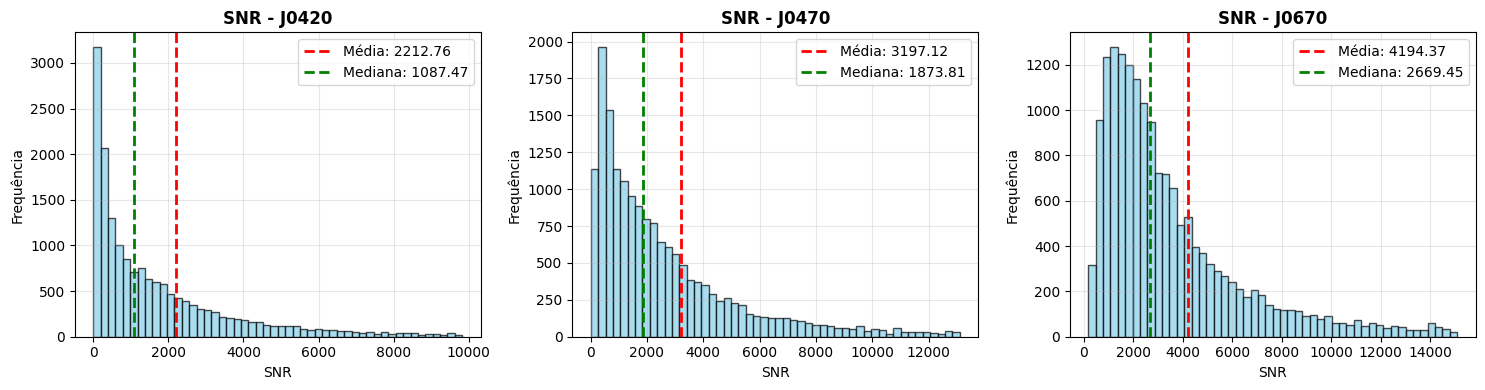


ESTATÍSTICAS DETALHADAS DAS BANDAS SELECIONADAS

J0420:
  Mínimo: 0.19
  Máximo: 39666.67
  Média: 2212.76
  Mediana: 1087.47
  Desvio Padrão: 3369.26
  Q1: 297.50
  Q3: 2681.42

J0470:
  Mínimo: 8.33
  Máximo: 53865.00
  Média: 3197.12
  Mediana: 1873.81
  Desvio Padrão: 4158.36
  Q1: 749.36
  Q3: 3841.52

J0670:
  Mínimo: 175.76
  Máximo: 37693.33
  Média: 4194.37
  Mediana: 2669.45
  Desvio Padrão: 4637.26
  Q1: 1511.45
  Q3: 4910.63


In [27]:
print("\n" + "=" * 60)
print("FASE 4: Visualização do SNR por Banda")
print("=" * 60)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

def plot_histogramas_snr_interativo(df_snr, filter_names):
    """
    Função interativa para plotar histogramas de SNR para bandas selecionadas
    """
    print("Bandas disponíveis:")
    for i, banda in enumerate(filter_names):
        print(f"{i:2d}. {banda}")

    print("\nDigite os números das bandas que deseja visualizar (separados por vírgula):")
    print("Exemplo: 0,5,10 ou 'all' para todas as bandas")

    try:
        entrada = input("Suas escolhas: ").strip()

        if entrada.lower() == 'all':
            bandas_selecionadas = filter_names
        else:
            indices = [int(x.strip()) for x in entrada.split(',')]
            bandas_selecionadas = [filter_names[i] for i in indices]

        n_bandas = len(bandas_selecionadas)

        # Configurar layout dos subplots
        fig = plt.figure(figsize=(15, 4 * ((n_bandas + 2) // 3)))
        gs = GridSpec((n_bandas + 2) // 3, 3, figure=fig)

        for idx, banda in enumerate(bandas_selecionadas):
            ax = fig.add_subplot(gs[idx // 3, idx % 3])
            snr_data = df_snr[f'SNR_{banda}']

            # Remover outliers extremos para melhor visualização
            q1 = snr_data.quantile(0.25)
            q3 = snr_data.quantile(0.75)
            iqr = q3 - q1
            limite_superior = q3 + 3 * iqr
            dados_filtrados = snr_data[snr_data <= limite_superior]

            # Plotar histograma
            ax.hist(dados_filtrados, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
            ax.axvline(snr_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {snr_data.mean():.2f}')
            ax.axvline(snr_data.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {snr_data.median():.2f}')

            ax.set_title(f'SNR - {banda}', fontsize=12, fontweight='bold')
            ax.set_xlabel('SNR')
            ax.set_ylabel('Frequência')
            ax.legend()
            ax.grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Estatísticas detalhadas para as bandas selecionadas
        print("\n" + "=" * 50)
        print("ESTATÍSTICAS DETALHADAS DAS BANDAS SELECIONADAS")
        print("=" * 50)

        for banda in bandas_selecionadas:
            snr_banda = df_snr[f'SNR_{banda}']
            print(f"\n{banda}:")
            print(f"  Mínimo: {snr_banda.min():.2f}")
            print(f"  Máximo: {snr_banda.max():.2f}")
            print(f"  Média: {snr_banda.mean():.2f}")
            print(f"  Mediana: {snr_banda.median():.2f}")
            print(f"  Desvio Padrão: {snr_banda.std():.2f}")
            print(f"  Q1: {snr_banda.quantile(0.25):.2f}")
            print(f"  Q3: {snr_banda.quantile(0.75):.2f}")

    except Exception as e:
        print(f"Erro na entrada: {e}")
        print("Selecionando 3 bandas aleatórias para demonstração...")
        bandas_aleatorias = np.random.choice(filter_names, size=3, replace=False)
        plot_histogramas_snr_interativo(df_snr, bandas_aleatorias)

# Executar visualização interativa
plot_histogramas_snr_interativo(df_snr, filter_names)

#### **Visualização Comparativa e Sumarização**
Para complementar a análise focada, o bloco a seguir oferece duas visualizações globais:

*   **Boxplots (Visualização Alternativa):** O primeiro gráfico é um boxplot da distribuição de SNR para todas as bandas, lado a lado. Esta é uma ferramenta visual superior aos 56 histogramas, pois permite uma comparação direta das medianas (centro da caixa), da dispersão (tamanho da caixa) e dos outliers (pontos) entre as diferentes bandas.
*   **Estatísticas Resumidas:** Finalmente, o código calcula as estatísticas descritivas do SNR para todas as bandas e as armazena em um novo DataFrame, snr_stats_df. A impressão desta tabela é o produto final quantitativo da análise, resumindo o desempenho de cada filtro fotométrico.









FASE 5: Visualização Comparativa e Sumarização
1. GERANDO BOXPLOT COMPARATIVO...


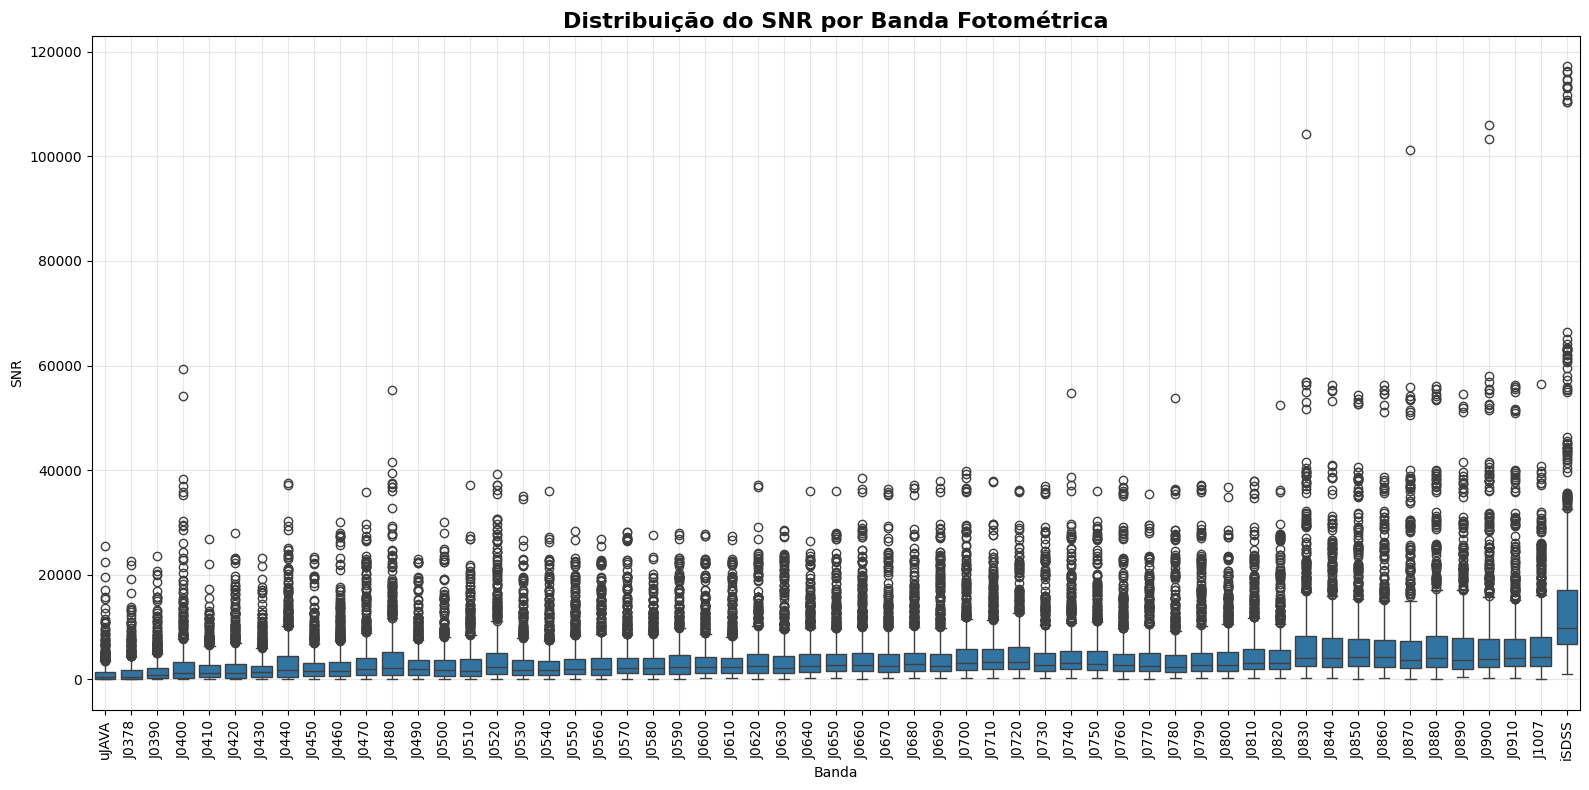


2. GERANDO HEATMAP DE CORRELAÇÃO...


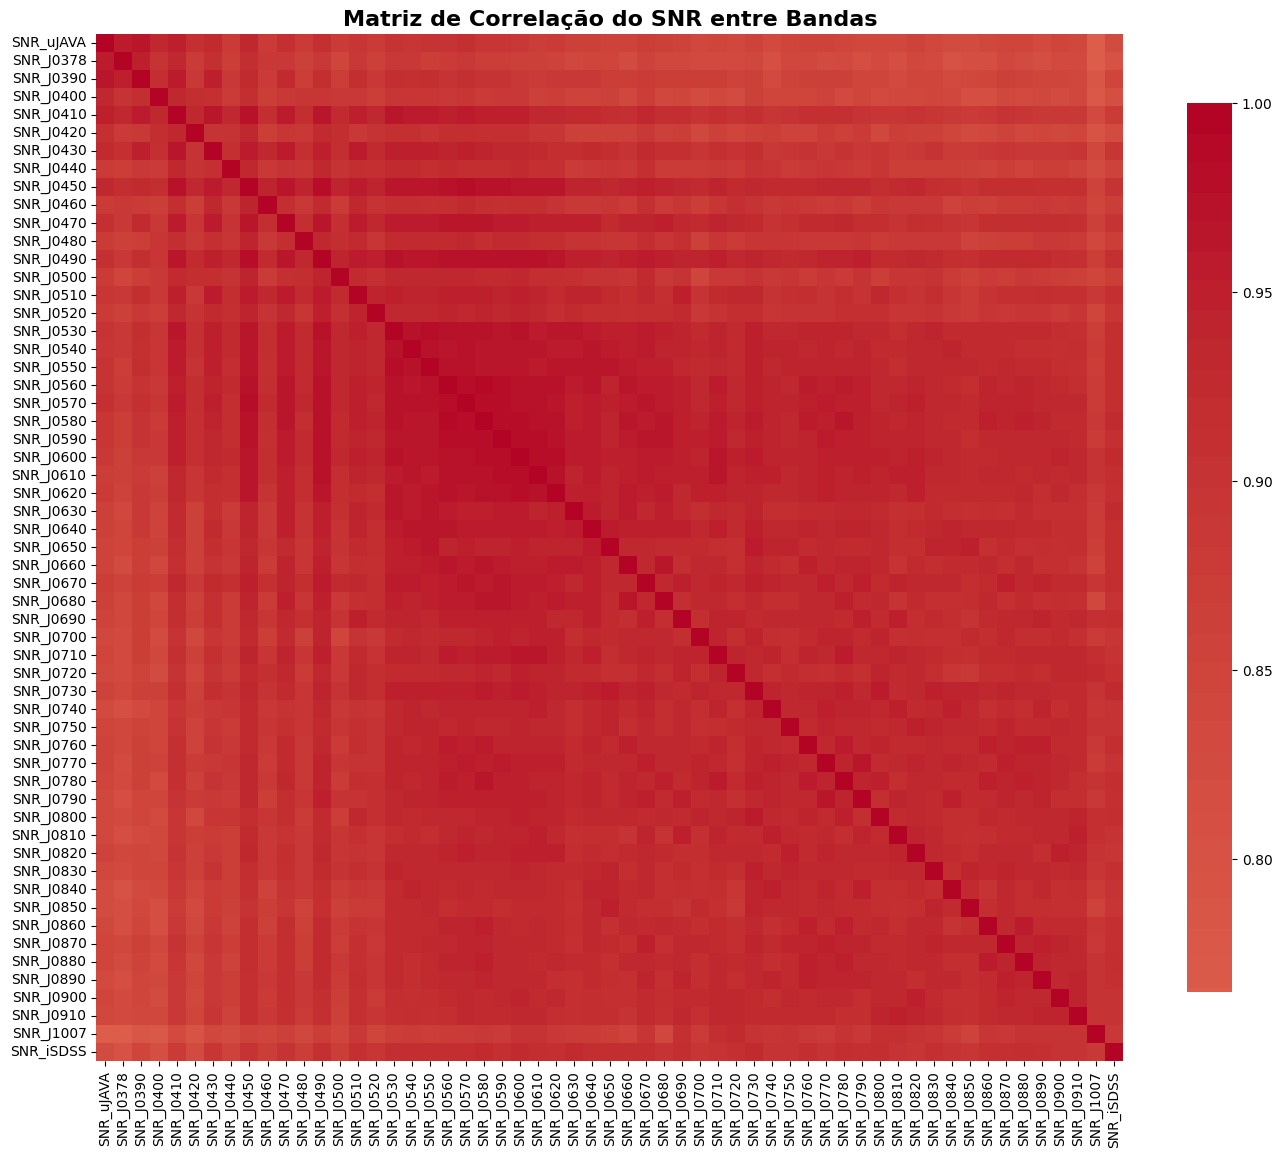


3. ESTATÍSTICAS SUMARIZADAS POR BANDA:

Top 10 bandas com maior SNR médio:
    Banda      Média    Mediana  Desvio_Padrão   Mínimo    Máximo        Q1  \
56  iSDSS  16243.954  10770.333      16828.218  453.638  124970.0  6860.300   
54  J0910   7199.079   4376.974       8313.614   95.897  106020.0  2587.737   
53  J0900   6962.308   3976.745       8454.956   59.416  106780.0  2264.224   
46  J0830   6960.644   4238.846       7854.825   85.072  104320.0  2488.817   
49  J0860   6855.296   4253.545       7558.765   28.971   58940.0  2512.335   
51  J0880   6792.620   3906.867       8096.898   45.443  105540.0  2193.654   
48  J0850   6786.339   4153.667       7719.703   82.169  105410.0  2455.810   
47  J0840   6635.138   3979.762       7598.895   33.106  107360.0  2300.969   
50  J0870   6261.938   3667.083       7503.589   64.903  103560.0  2093.432   
55  J1007   6251.590   4042.171       6186.012   20.063   56750.0  2444.345   

           Q3        IQR  
56  18845.625  11985.325  


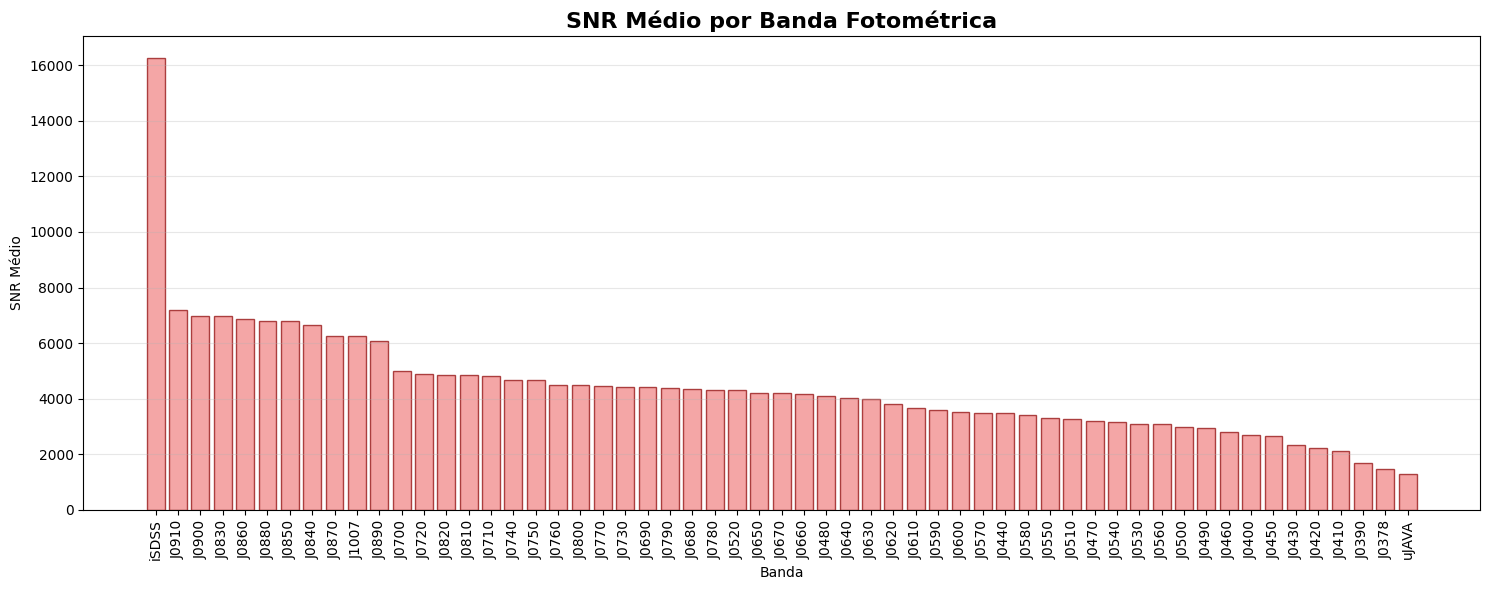


SALVANDO RESULTADOS FINAIS
Análise completa concluída! Arquivos salvos:
- df_snr_calculado.csv
- df_fluxos_calculados.csv
- estatisticas_snr_por_banda.csv


In [28]:
## Visualização Comparativa e Sumarização

print("\n" + "=" * 60)
print("FASE 5: Visualização Comparativa e Sumarização")
print("=" * 60)

def visualizacao_comparativa_snr(df_snr, filter_names):
    """
    Visualizações comparativas completas do SNR entre bandas
    """

    # 1. Boxplot de todas as bandas
    print("1. GERANDO BOXPLOT COMPARATIVO...")

    # Preparar dados para boxplot
    snr_data_boxplot = []
    bandas_boxplot = []

    for banda in filter_names:
        snr_values = df_snr[f'SNR_{banda}'].values
        # Amostrar para não sobrecarregar o plot
        if len(snr_values) > 1000:
            snr_values = np.random.choice(snr_values, size=1000, replace=False)
        snr_data_boxplot.extend(snr_values)
        bandas_boxplot.extend([banda] * len(snr_values))

    df_boxplot = pd.DataFrame({
        'Banda': bandas_boxplot,
        'SNR': snr_data_boxplot
    })

    plt.figure(figsize=(16, 8))
    sns.boxplot(data=df_boxplot, x='Banda', y='SNR')
    plt.title('Distribuição do SNR por Banda Fotométrica', fontsize=16, fontweight='bold')
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2. Heatmap de correlação do SNR entre bandas
    print("\n2. GERANDO HEATMAP DE CORRELAÇÃO...")

    # Calcular matriz de correlação
    snr_matrix = df_snr[[f'SNR_{banda}' for banda in filter_names]]
    correlacao = snr_matrix.corr()

    plt.figure(figsize=(14, 12))
    sns.heatmap(correlacao,
                annot=False,
                cmap='coolwarm',
                center=0,
                square=True,
                cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correlação do SNR entre Bandas', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 3. Estatísticas sumarizadas
    print("\n3. ESTATÍSTICAS SUMARIZADAS POR BANDA:")

    estatisticas_por_banda = []
    for banda in filter_names:
        snr_banda = df_snr[f'SNR_{banda}']
        estatisticas_por_banda.append({
            'Banda': banda,
            'Média': snr_banda.mean(),
            'Mediana': snr_banda.median(),
            'Desvio_Padrão': snr_banda.std(),
            'Mínimo': snr_banda.min(),
            'Máximo': snr_banda.max(),
            'Q1': snr_banda.quantile(0.25),
            'Q3': snr_banda.quantile(0.75),
            'IQR': snr_banda.quantile(0.75) - snr_banda.quantile(0.25)
        })

    snr_stats_df = pd.DataFrame(estatisticas_por_banda)

    # Ordenar por média de SNR (decrescente)
    snr_stats_df = snr_stats_df.sort_values('Média', ascending=False)

    print("\nTop 10 bandas com maior SNR médio:")
    print(snr_stats_df.head(10).round(3))

    print("\nBottom 10 bandas com menor SNR médio:")
    print(snr_stats_df.tail(10).round(3))

    # 4. Gráfico de barras com SNR médio por banda
    plt.figure(figsize=(15, 6))
    plt.bar(snr_stats_df['Banda'], snr_stats_df['Média'],
            color='lightcoral', alpha=0.7, edgecolor='darkred')
    plt.title('SNR Médio por Banda Fotométrica', fontsize=16, fontweight='bold')
    plt.xlabel('Banda')
    plt.ylabel('SNR Médio')
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return snr_stats_df

# Executar análise comparativa
snr_stats_df = visualizacao_comparativa_snr(df_snr, filter_names)

# Salvar resultados finais
print("\n" + "=" * 60)
print("SALVANDO RESULTADOS FINAIS")
print("=" * 60)

df_snr.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_snr_calculado.csv', index=False)
df_fluxo.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_fluxos_calculados.csv', index=False)
snr_stats_df.to_csv('/content/drive/MyDrive/Notebook fotometrias/estatisticas_snr_por_banda.csv', index=False)

print("Análise completa concluída! Arquivos salvos:")
print("- df_snr_calculado.csv")
print("- df_fluxos_calculados.csv")
print("- estatisticas_snr_por_banda.csv")

No trecho seguinte, apresenta uma solução muito mais elegante e interativa para esse problema. Ele redefine a FASE 3:



*   **Interatividade:** O código lista todas as bandas disponíveis e solicita ativamente que o usuário digite os números das bandas que deseja analisar (ex: "45,7,39").
*   **Robustez:** Utiliza threading para criar um timeout de 5 minutos. Se o usuário não responder, o script não trava; ele seleciona 3 bandas aleatoriamente e continua.
*   **Análise Focada:** Ele então plota histogramas limpos apenas para as bandas selecionadas, incluindo linhas de média e mediana.
*   **Relatório Detalhado:** Por fim, imprime estatísticas descritivas (mínimo, máximo, média, mediana, desvio padrão) apenas para as bandas selecionadas.

Esta abordagem interativa é uma grande vantagem para a análise exploratória, permitindo ao cientista focar em bandas de interesse específico (ex: J0810, J0430, J0750)